In [1]:
from datasets.mnist import MNIST
import matplotlib.pyplot as plt

from nn.dataloader import DataLoader
from nn.model import Sequential
from nn.activations import relu, tanh, sigmoid
from nn.layers import Dense
from nn.loss import MeanSquaredError, CategoricalCrossEntropy
from nn.optimizer import GradientDescent

from nn.preprocessing import categorical_encoding, transform_input_data

from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
data = MNIST(mode='full')

All required files are exist!


In [3]:
train_data, test_data = data.dataset
X_train, y_train = train_data
X_test, y_test = test_data

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test_ = scaler.transform(X_test)

In [5]:
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [30]:
batch_size = 16

nn = Sequential(
    input_shape = (batch_size, 784),
    layers = [
        Dense(128, activation='relu'),
        Dense(10, activation='sigmoid')
    ],
    optimizer=GradientDescent(0.1),
    loss=CategoricalCrossEntropy()
)

In [31]:
nn.info()

model: Sequential
------------------------------
Dense | (128,784) <(128, 1)> | relu
Dense | (10,128) <(10, 1)> | sigmoid
Optimizer: GradientDescent
loss: categorical_cross_entropy


In [32]:
dl_train = DataLoader(X_train, y_train)

In [33]:
dl_train = dl_train.apply(to_y=True, fn=categorical_encoding)

(60000,)


In [34]:
dl_train_b = dl_train.batch(batch_size, upsample=True)

Recieved shapes:
(60000, 784) (60000, 10)


In [35]:
print(nn.weights.wl0.weights.mean())
print(nn.weights.wl1.weights.mean())

0.005003367243105336
0.005008728021300795


In [24]:
for x, y in dl_train.data:
    print(x.shape, y.shape)
    break

(784, 16) (10, 16)


In [36]:
nn.fit(dl_train_b, batch_size=batch_size, epochs=4)

<class 'nn.dataloader.DataLoader'> type as input data
Start training for 4 epochs


Epoch 1: 100%|██████████| 3750/3750 [00:05<00:00, 639.44samples/s]


categorical_cross_entropy: 4.087599587778015e-06


Epoch 2: 100%|██████████| 3750/3750 [00:06<00:00, 575.02samples/s]


categorical_cross_entropy: 1.9801763563714827e-06


Epoch 3: 100%|██████████| 3750/3750 [00:06<00:00, 587.86samples/s]


categorical_cross_entropy: 1.290740551805758e-06


Epoch 4: 100%|██████████| 3750/3750 [00:06<00:00, 603.14samples/s]

categorical_cross_entropy: 9.524875990193739e-07


In [37]:
print(nn.weights.wl0.weights.mean())
print(nn.weights.wl1.weights.mean())
# print(nn.weights.wl2.weights.mean())

0.0030783854172495772
0.10510827783050478


In [38]:
print(X_test_[0].shape)
X_test_ = transform_input_data(X_test_)
print(X_test_[0].shape)

(784, 1)
(784, 1)


Accuracy: 0.0057


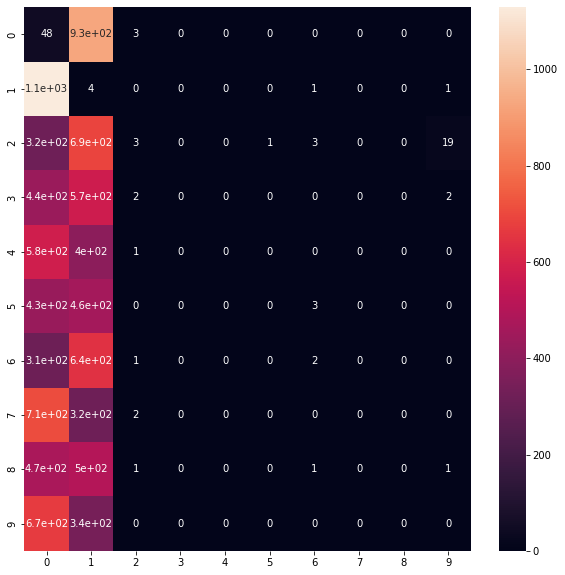

In [39]:
y_hats = []
for x_i in X_test_:
    y_hat = nn.predict(x_i)
    y_hats.append(np.argmax(y_hat))

acc = accuracy_score(y_test, y_hats)
print('Accuracy:', acc)

cm = confusion_matrix(y_test, y_hats)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.show()

In [40]:
y_hats

[0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
